1. Load the dataset from Hugging Face, https://huggingface.co/datasets/LabHC/bias_in_bios

In [15]:
from datasets import load_dataset
import pandas as pd
import csv

In [3]:

dataset = load_dataset("LabHC/bias_in_bios")


As the data is already split in train, test and dev, we need to concatenate the data to get one whole dataframe.

In [8]:
df_train = pd.DataFrame(dataset['train'])
df_test = pd.DataFrame(dataset['test'])
df_valid = pd.DataFrame(dataset['dev'])

# Combine all into one DataFrame
df = pd.concat([df_train, df_test, df_valid], ignore_index=True)

print(df.head())  # View first few rows

                                           hard_text  profession  gender
0  He is also the project lead of and major contr...          21       0
1  She is able to assess, diagnose and treat mino...          13       1
2  Prior to law school, Brittni graduated magna c...           2       1
3  He regularly contributes to India’s First Onli...          11       0
4  He completed his medical degree at Northwester...          21       0


In [7]:
df.shape

(396189, 3)


Mapping of the occupation with the 'profession' column as described in Bias_in_Bios Dataset documentation.

In [9]:
occupation_mapping = {
    0: "accountant",
    1: "architect",
    2: "attorney",
    3: "chiropractor",
    4: "comedian",
    5: "composer",
    6: "dentist",
    7: "dietitian",
    8: "dj",
    9: "filmmaker",
    10: "interior_designer",
    11: "journalist",
    12: "model",
    13: "nurse",
    14: "painter",
    15: "paralegal",
    16: "pastor",
    17: "personal_trainer",
    18: "photographer",
    19: "physician",
    20: "poet",
    21: "professor",
    22: "psychologist",
    23: "rapper",
    24: "software_engineer",
    25: "surgeon",
    26: "teacher",
    27: "yoga_teacher"
}

Mapping of 'gender' column with 'Male' and 'Female'

In [10]:
gender_mapping = {
    0: "Male",
    1: "Female"
}

In [17]:
df['profession'] = df['profession'].map(occupation_mapping).fillna(df['profession'])
df['gender'] = df['gender'].map(gender_mapping).fillna(df['gender'])

df.to_csv(
    "bias_profession_gender.csv", 
    index=False, 
    quoting=csv.QUOTE_ALL,   # puts quotes around all fields
    escapechar='\\'          # escape character for special chars
)
df.head()

,hard_text,profession,gender
0,He is also the project lead of and major contr...,professor,Male
1,"She is able to assess, diagnose and treat mino...",nurse,Female
2,"Prior to law school, Brittni graduated magna c...",attorney,Female
3,He regularly contributes to India’s First Onli...,journalist,Male
4,He completed his medical degree at Northwester...,professor,Male


In [20]:
gender_counts = df.groupby(['profession', 'gender']).size().unstack(fill_value=0)
gender_counts

gender,Female,Male
profession,,
accountant,2067,3566
architect,2393,7715
attorney,12471,20099
chiropractor,699,1956
comedian,594,2215
composer,917,4682
dentist,5148,9437
dietitian,3669,283
dj,211,1275


Add Percentages

In [26]:
gender_percent = gender_counts.div(gender_counts.sum(axis=1), axis=0) * 100
gender_percent.round(2)

gender,Female,Male
profession,,
accountant,36.69,63.31
architect,23.67,76.33
attorney,38.29,61.71
chiropractor,26.33,73.67
comedian,21.15,78.85
composer,16.38,83.62
dentist,35.30,64.70
dietitian,92.84,7.16
dj,14.20,85.80


### Visualisation

Side-by-side bar chart

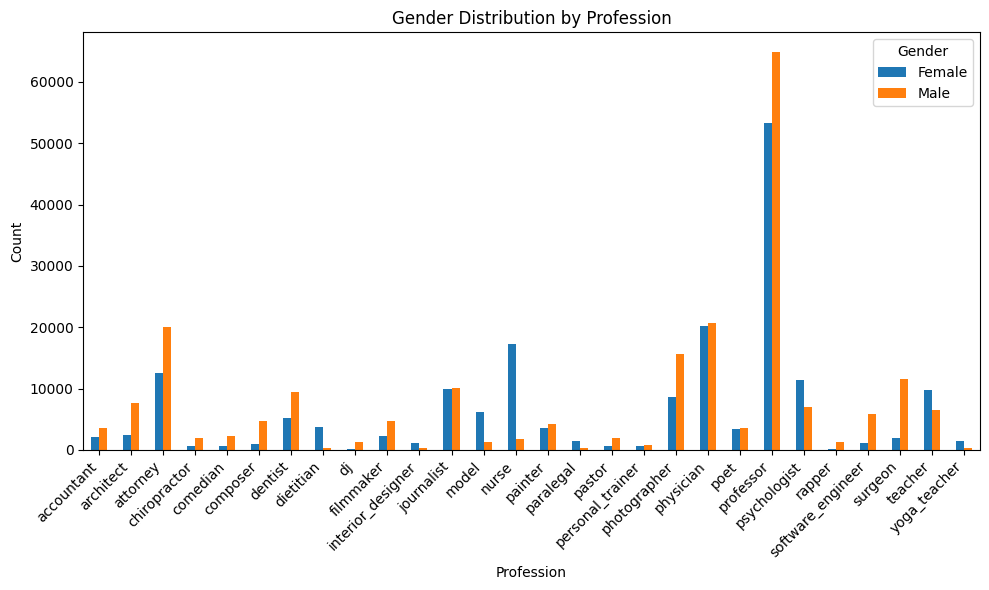

In [22]:
import matplotlib.pyplot as plt

gender_counts.plot(kind='bar', figsize=(10, 6))
plt.title("Gender Distribution by Profession")
plt.xlabel("Profession")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


Stacked bar chart by gender percentage

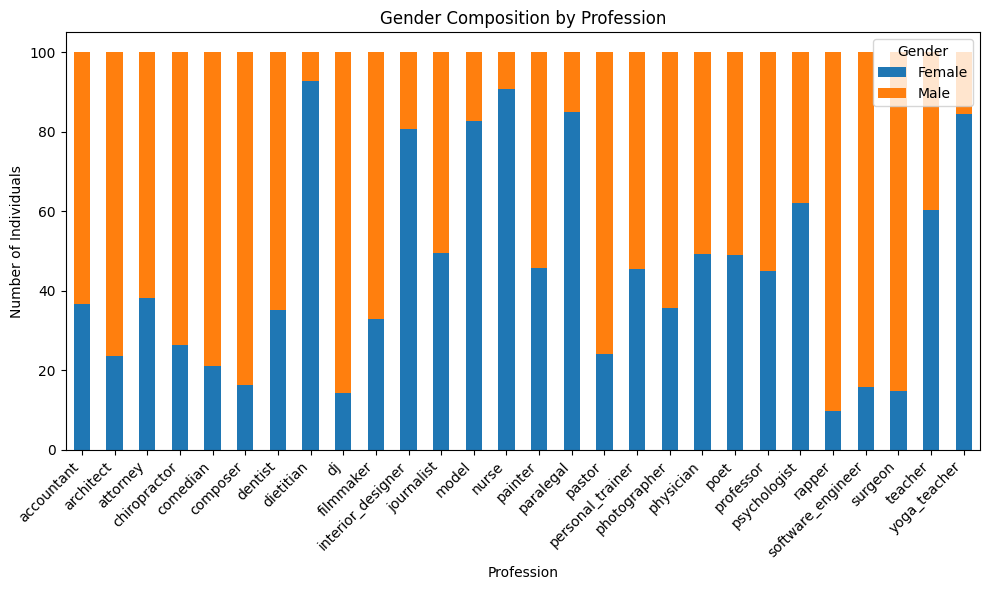

In [27]:
gender_percent.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Gender Composition by Profession")
plt.xlabel("Profession")
plt.ylabel("Number of Individuals")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


Heatmap (for quick visual pattern)

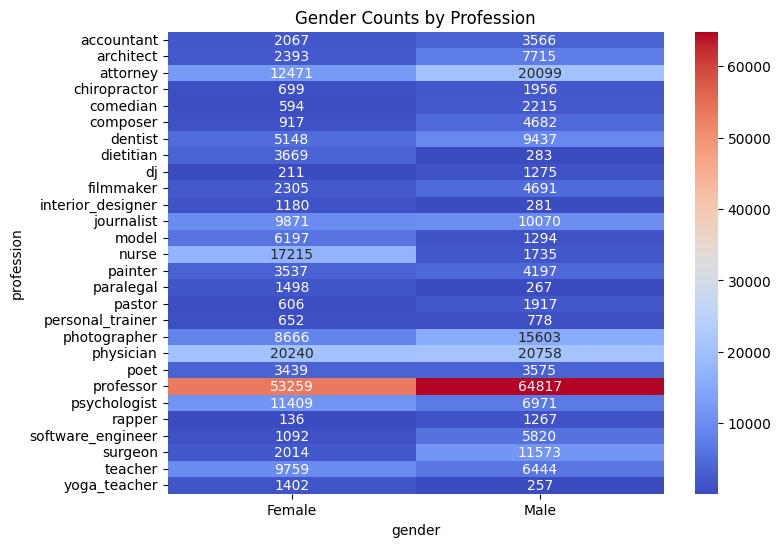

In [24]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(gender_counts, annot=True, cmap="coolwarm", fmt="d")
plt.title("Gender Counts by Profession")
plt.show()


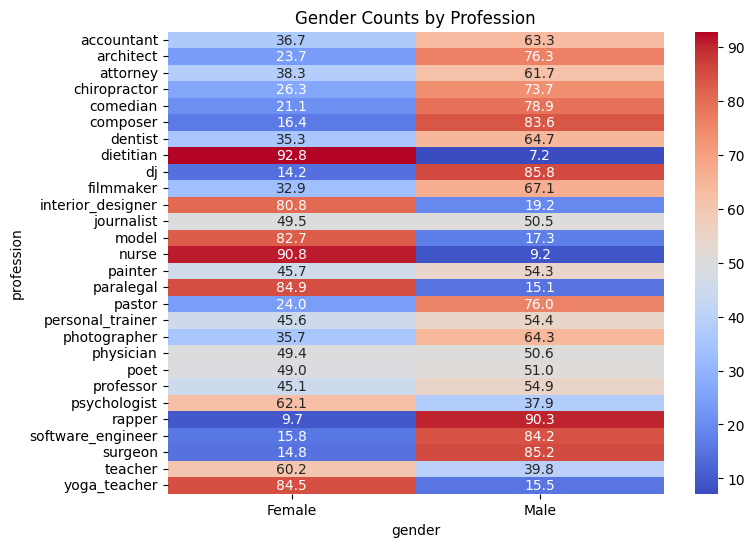

In [29]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(gender_percent, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Gender Counts by Profession")
plt.show()


In [25]:
gender_counts.to_csv("gender_by_profession.csv")
